# Decision tree to predict car sales

In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
to_change = {
    'yes': 1,
    'no': 0
}

data.sold = data.sold.map(to_change)

In [3]:
from datetime import datetime

current_year = datetime.today().year
data['current_year'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,current_year
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [4]:
data['km_per_year'] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,current_year,km_per_year
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [5]:
data = data.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
data.head()

,price,sold,current_year,km_per_year
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

x = data[['price','current_year','km_per_year']]
y = data['sold']

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    # This parameter leaves the train_y and test_y proportional to each other for a more accurate accuracy
    stratify = y)

print('Training with %d elements and testing with %d elements ' % (len(train_x), len(test_y)))

model = LinearSVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print('Accuracy of %.2f%%' % accuracy)

Training with 7500 elements and testing with 2500 elements 
Accuracy of 58.00%
C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [7]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)

accuracy = dummy_stratified.score(test_x, test_y) * 100

print('Accuracy of %.2f%%' % accuracy)

Accuracy of 52.44%
C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [8]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(train_x, train_y)

accuracy = dummy_most_frequent.score(test_x, test_y) * 100

print('Accuracy of %.2f%%' % accuracy)

Accuracy of 50.68%


In [9]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y)

print('Training with %d elements and testing with %d elements ' % (len(train_x), len(test_y)))

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print('Accuracy of %.2f%%' % accuracy)

Training with 7500 elements and testing with 2500 elements 
Accuracy of 77.48%


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y)

print('Training with %d elements and testing with %d elements ' % (len(raw_train_x), len(test_y)))


model = DecisionTreeClassifier(max_depth=2)
model.fit(raw_train_x, train_y)

predictions = model.predict(raw_test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print('Accuracy of %.2f%%' % accuracy)

Training with 7500 elements and testing with 2500 elements 
Accuracy of 76.84%


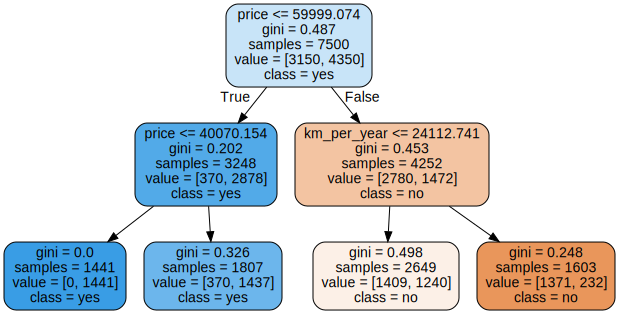

In [13]:
from sklearn.tree import export_graphviz
import graphviz
# must install graphviz on the underlying OS

features = x.columns
dot_data = export_graphviz(model,
                            filled=True,
                            rounded=True,
                            feature_names=features,
                            class_names=['no', 'yes'])

graphic = graphviz.Source(dot_data)

graphic
